<a href="https://colab.research.google.com/github/gusmaomarcos/alura/blob/main/sklearn3_tree_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=ConvergencyWarning)

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url)
dados.head(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {'no':0, 'yes':1}
dados.sold = dados.sold.map(a_trocar)

In [ ]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

dados['car_age'] = datetime.today().year - dados['model_year']

In [ ]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dados['km_per_year'] = dados['mileage_per_year'] * 1.60934

In [ ]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age,km_per_year
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dados = dados.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
dados.head()

,price,sold,car_age,km_per_year
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
x = dados[['price', 'car_age', 'km_per_year']]
y = dados['sold']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify=y)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 58.00%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia do dummy strat foi %.2f%%' % (taxa_de_acerto*100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia do dummy strat foi 49.44%


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia do dummy most frequent foi %.2f%%' % (taxa_de_acerto*100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia do dummy most frequent foi 58.00%


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
dummy.score(teste_x, teste_y)


0.58

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
dummy.score(teste_x, teste_y)


0.5028

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))


Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 77.48%


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)


modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))
print('A acurácia foi %.2f%%' % (taxa_de_acerto*100))


Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi 76.84%


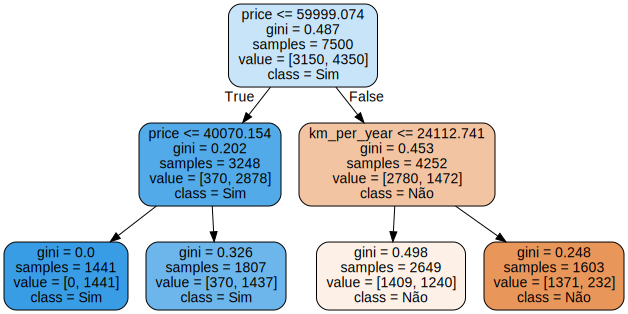

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, filled = True, rounded = True, class_names=['Não', 'Sim'])
grafico = graphviz.Source(dot_data)
grafico